In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('avocado_ripeness_dataset.csv')

In [ ]:
data.head(10)

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
5,13.6,2,51,11,black,34,173,281,ripe
6,52.3,277,75,57,purple,61,187,237,breaking
7,88.1,91,93,48,dark green,73,281,148,hard
8,85.2,116,89,67,dark green,77,220,147,hard
9,67.3,77,79,78,green,66,232,142,pre-conditioned


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [ ]:
data.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


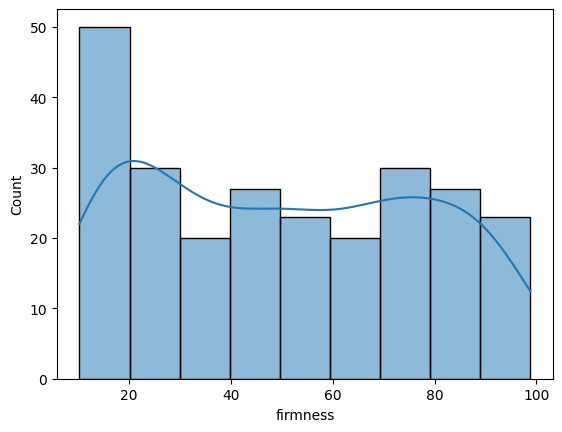

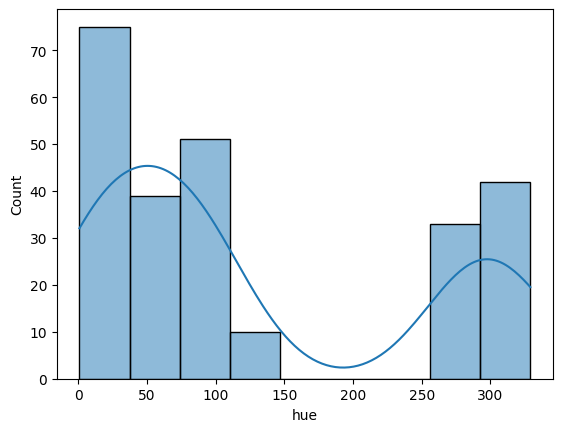

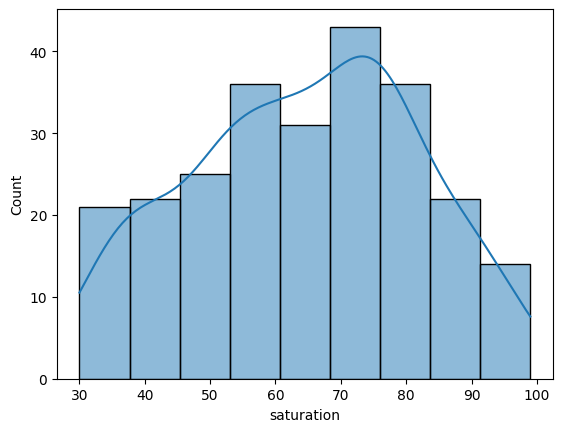

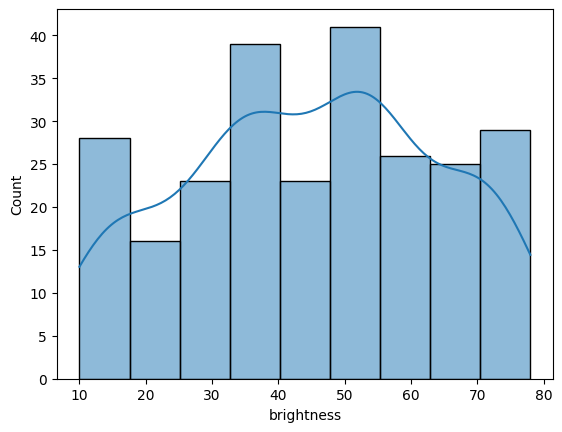

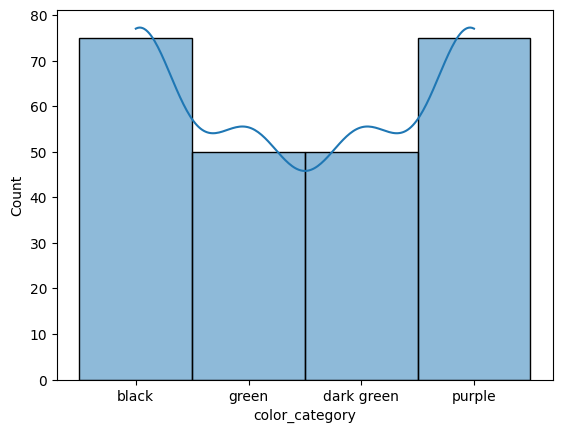

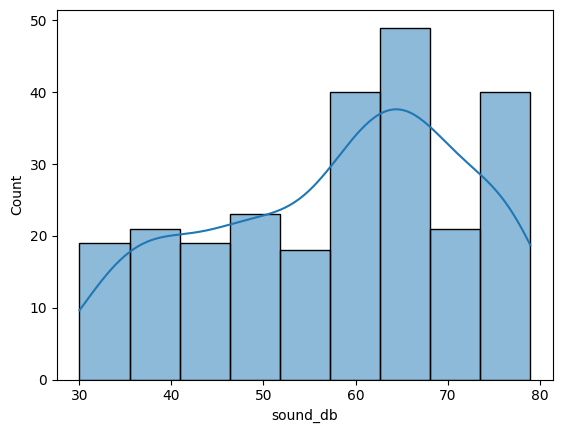

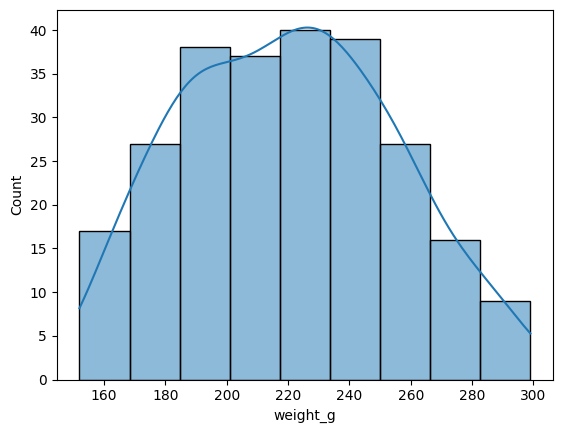

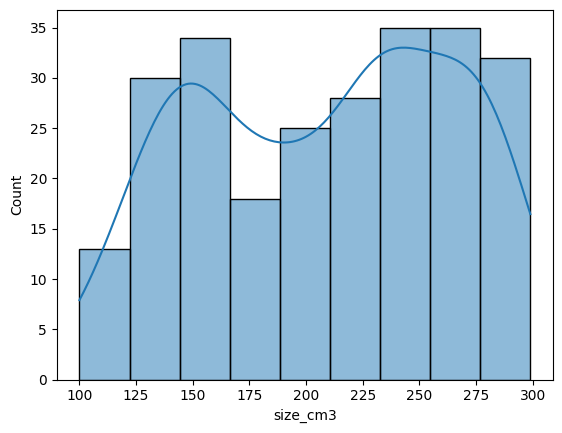

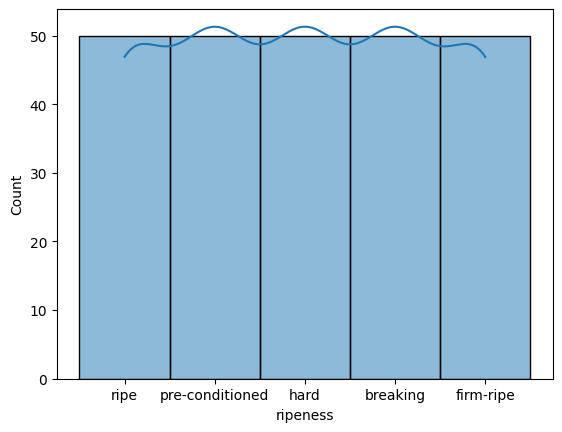

In [ ]:
for i in data:
  sns.histplot(data[i], kde=True)
  plt.show()


<Axes: xlabel='firmness', ylabel='ripeness'>

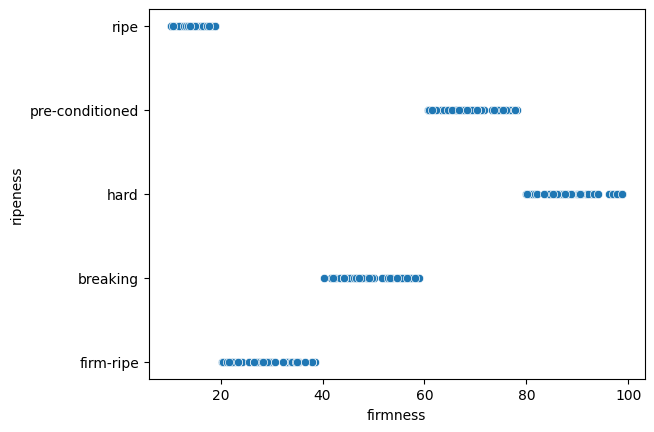

In [ ]:
sns.scatterplot(data=data, x='firmness', y='ripeness')

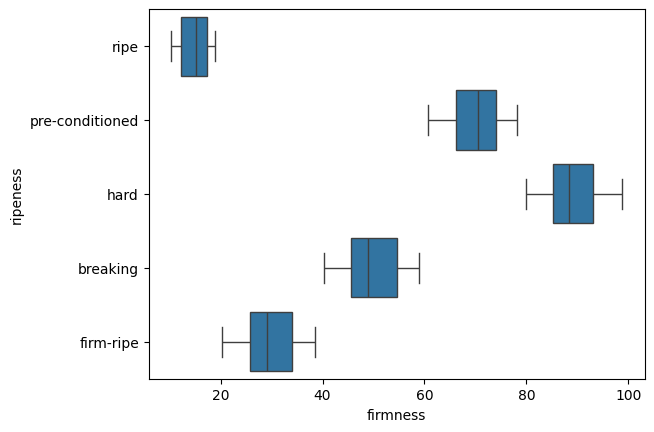

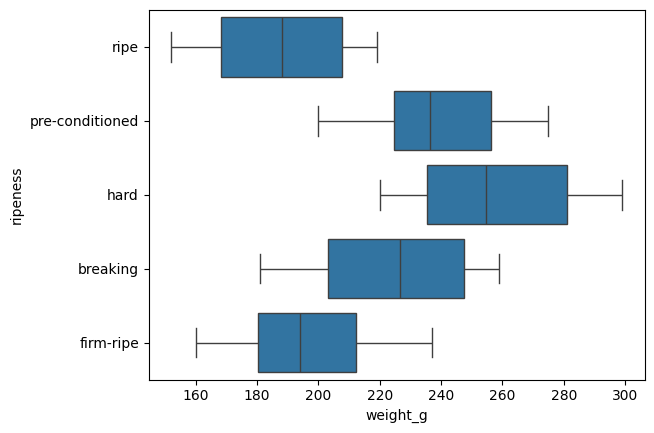

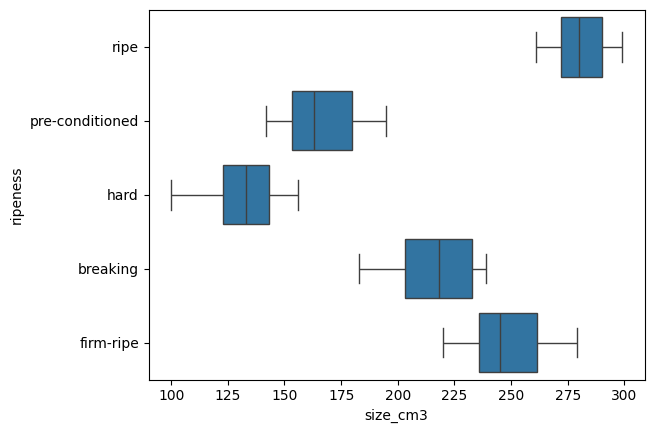

In [ ]:
physical_features = ['firmness', 'weight_g', 'size_cm3']

for i in physical_features:
  sns.boxplot(data=data, x=i, y='ripeness')
  plt.show()

In [ ]:
num_columns = data.select_dtypes(include=['int64', 'float64'])

In [ ]:
corr = num_columns.corr()

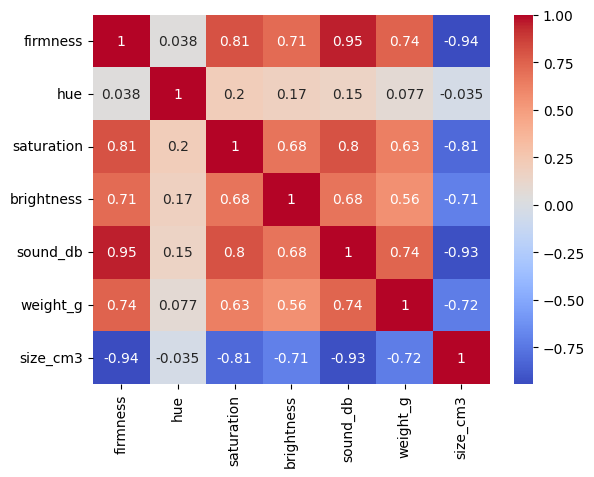

In [ ]:
sns.heatmap(corr, annot=True, cmap='coolwarm', )
plt.show()

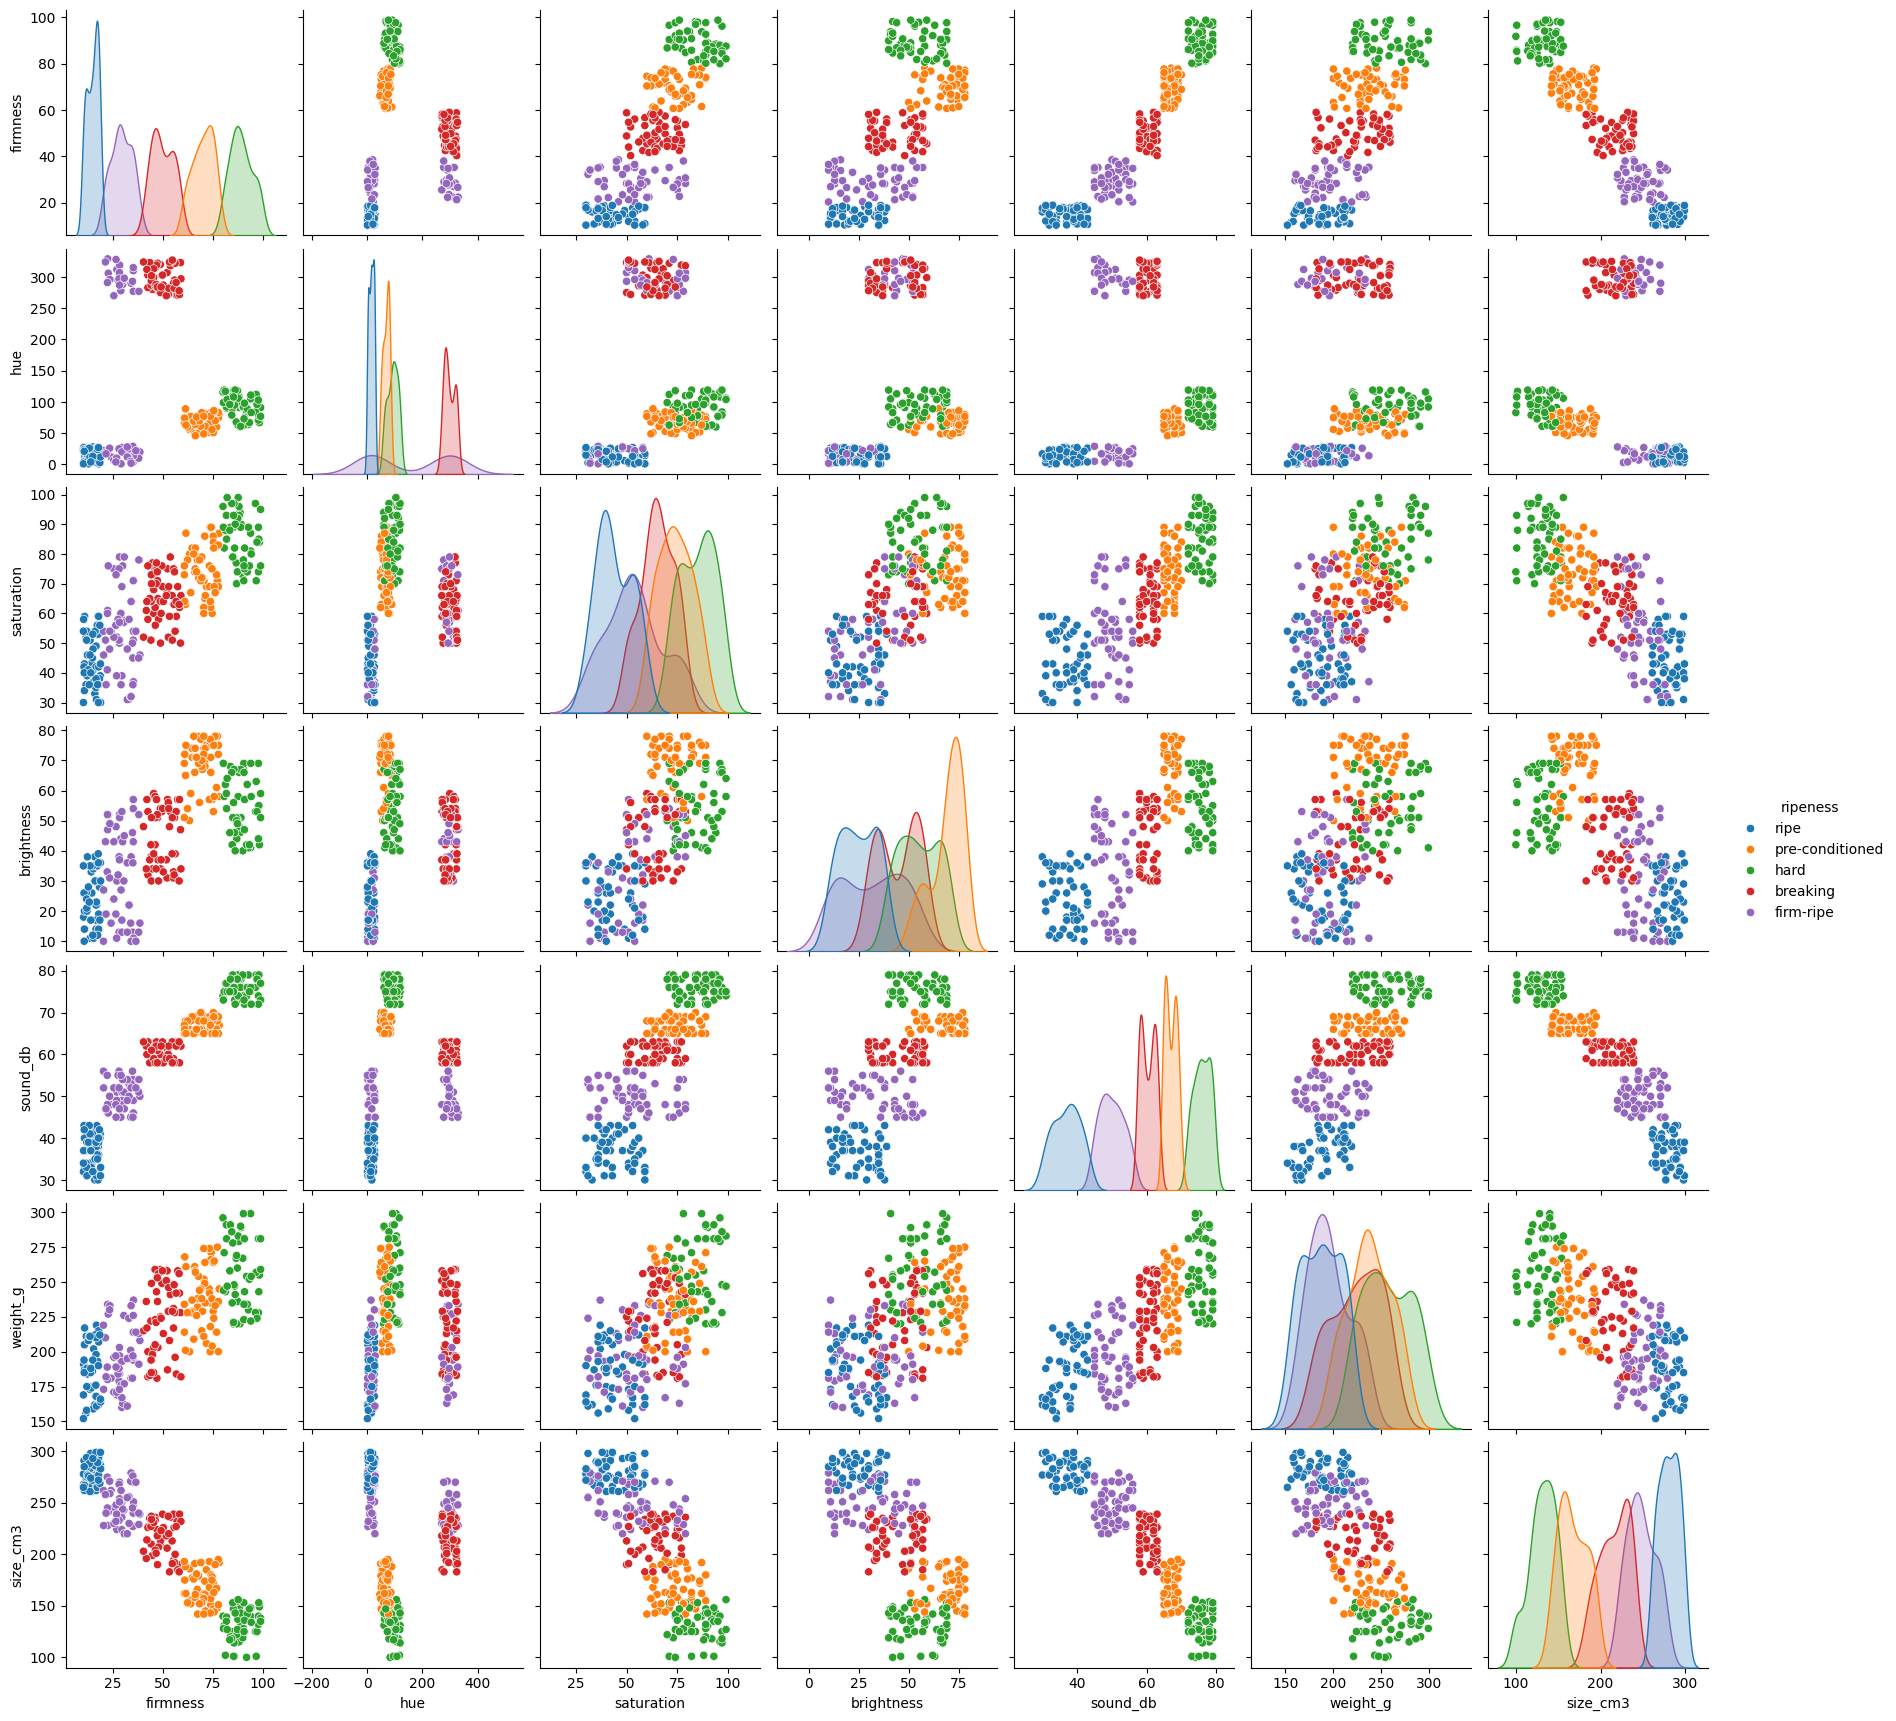

In [ ]:
sns.pairplot(data, hue='ripeness')
plt.show()

In [ ]:
df = data.copy()

In [ ]:
df['ripeness'] = df['ripeness'].map({'hard': 1, 'pre-conditioned': 2, 'breaking' : 3, 'firm-ripe': 4, 'ripe': 5})

In [ ]:
df.value_counts('ripeness')

,count
ripeness,
1,50
2,50
3,50
4,50
5,50


In [ ]:
df.value_counts('color_category')

,count
color_category,
black,75
purple,75
dark green,50
green,50


In [ ]:
df['color_category'] = df['color_category'].map({'black': 1, 'purple': 2,'dark green':3, 'green':4})

In [ ]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.drop(columns='ripeness'))

In [ ]:
x = scaled_df
y = df['ripeness']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

1.0

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 8,  0,  0,  0,  0],
       [ 0,  7,  0,  0,  0],
       [ 0,  0, 13,  0,  0],
       [ 0,  0,  0,  9,  0],
       [ 0,  0,  0,  0, 13]])

In [ ]:
df.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'color_category',
       'sound_db', 'weight_g', 'size_cm3', 'ripeness'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    int64  
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 17.7 KB


In [ ]:
import joblib

joblib.dump(model, 'modelAvo.pkl')
joblib.dump(scaler, 'scalerAvo.pkl')

['scalerAvo.pkl']

In [ ]:
data

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking
...,...,...,...,...,...,...,...,...,...
245,94.1,83,80,58,dark green,72,254,134,hard
246,21.6,17,36,19,black,47,182,240,firm-ripe
247,14.0,4,40,17,black,37,188,274,ripe
248,61.5,63,87,75,green,65,261,162,pre-conditioned


In [ ]:
ndata = data

In [ ]:
data['ripeness'] = data['ripeness'].map({'hard': 1, 'pre-conditioned': 2, 'breaking' : 3, 'firm-ripe': 4, 'ripe': 5})

In [ ]:
data = pd.get_dummies(data, columns=['color_category'], drop_first=True, dtype=int)

In [ ]:
x = data.drop(columns='ripeness')
y = data['ripeness']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
y_predict = rf_model.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

1.0

In [ ]:
import joblib

joblib.dump(rf_model, 'modelAvo2.pkl')


['modelAvo2.pkl']

In [ ]:
data.columns

Index(['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g',
       'size_cm3', 'ripeness', 'color_category_dark green',
       'color_category_green', 'color_category_purple'],
      dtype='object')

In [ ]:
ndata.value_counts('color_category')

,count
color_category,
black,75
purple,75
dark green,50
green,50
